In [1]:
import lightning as L
import torch
import torchvision
import torchmetrics
from lightning.pytorch.loggers import CSVLogger
import matplotlib.pyplot as plt
import numpy as np 

from shared_utilities import LightningModel, MnistDataModule, plot_loss_and_acc

In [2]:
L.pytorch.seed_everything(123)

dm = MnistDataModule(batch_size=64)
dm.prepare_data()
dm.setup()

Seed set to 123


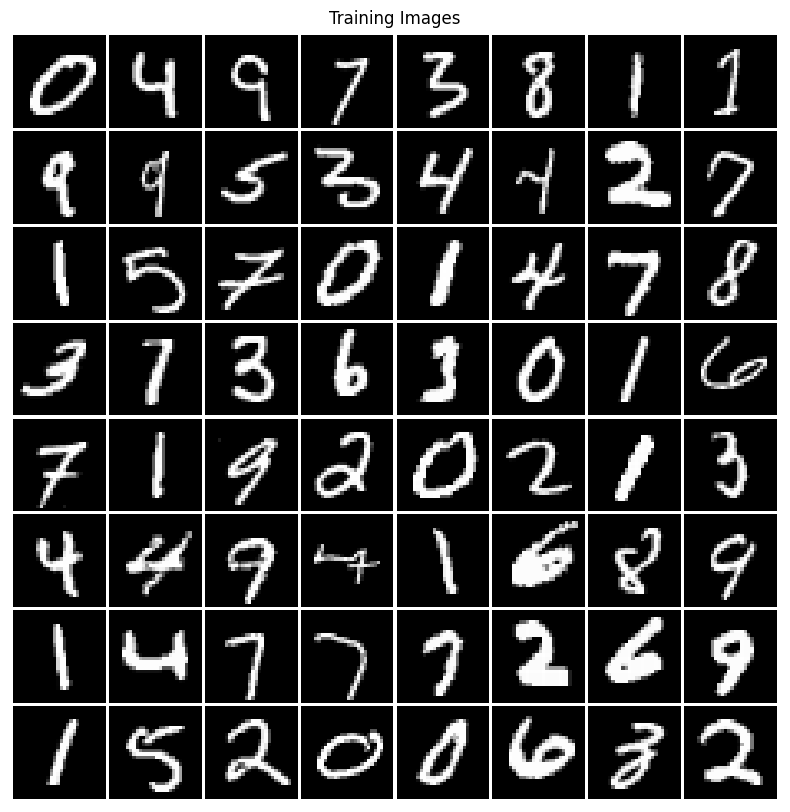

In [3]:
for image, labels in dm.train_dataloader():
    break

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    image[:64],
    padding=1,
    pad_value = 1,
    normalize=True),
    (1,2,0)
))

plt.show()

In [16]:
class PyTorchCNN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        
        self.cnn_layers = torch.nn.Sequential(
            torch.nn.Conv2d(1, 3, kernel_size=5),
            torch.nn.BatchNorm2d(3),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),

            torch.nn.Conv2d(3, 16, kernel_size=3),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),

            torch.nn.Conv2d(16, 32, kernel_size=3),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),)


        self.fc_layers = torch.nn.Sequential(
            torch.nn.Linear(32, 20),
            torch.nn.BatchNorm1d(20),
            torch.nn.ReLU(),

            torch.nn.Linear(20, num_classes)
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        x = torch.flatten(x, start_dim=1)
        logits = self.fc_layers(x)
        return logits


In [17]:
L.seed_everything(123)
dm = MnistDataModule()

pytorch_model = PyTorchCNN(num_features=784, num_classes=10)
lightning_model = LightningModel(pytorch_model, learning_rate=0.1)

trainer = L.Trainer(
    max_epochs=10, 
    accelerator="cpu", 
    devices="auto", 
    logger=CSVLogger(save_dir="logs/", name="my_models"),
    deterministic=True,)

Seed set to 123
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [18]:
trainer.fit(model=lightning_model, datamodule=dm)


  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchCNN         | 6.2 K 
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
6.2 K     Trainable params
0         Non-trainable params
6.2 K     Total params
0.025     Total estimated model params size (MB)


c:\Users\Tai Nguyen\AppData\Local\Programs\Python\Python39\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Epoch 9: 100%|██████████| 859/859 [00:22<00:00, 37.92it/s, v_num=3, val_loss=0.0619, val_acc=0.982, train_acc=0.989]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 859/859 [00:22<00:00, 37.90it/s, v_num=3, val_loss=0.0619, val_acc=0.982, train_acc=0.989]


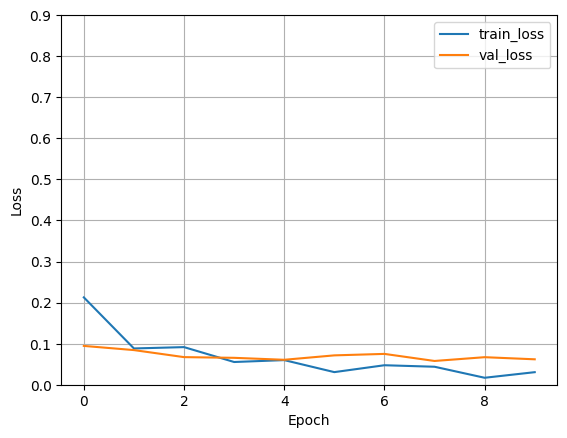

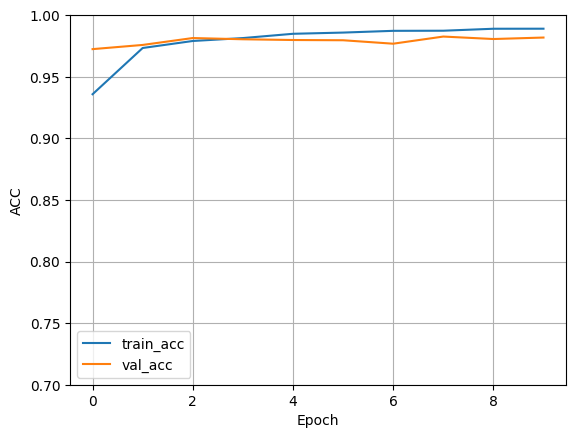

In [19]:
plot_loss_and_acc(trainer.logger.log_dir)

In [20]:
trainer.test(model=lightning_model, datamodule=dm)

c:\Users\Tai Nguyen\AppData\Local\Programs\Python\Python39\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 157/157 [00:03<00:00, 51.22it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9846000075340271     │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.9846000075340271}]